# New Section

In [ ]:

import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline
import nltk
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
import pandas as pd
import sqlite3
import re
import os
import time
import matplotlib.pyplot as plt
#import nbconvert
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive/SM_FRIEND_NEWSDATA

/gdrive/My Drive/SM_FRIEND_NEWSDATA


In [ ]:
data = pd.read_csv('finalsamit_data.csv').apply(lambda x: x.astype(str).str.lower())

In [ ]:
data.shape

(376211, 3)

In [ ]:
data.drop_duplicates(keep=False, inplace=True)

In [ ]:
data.shape

(373712, 3)

In [ ]:
pip install bnlp_toolkit

In [ ]:
stopwords = pd.read_csv('stopwordsnew.csv')
#stopwords = pd.read_csv('got_stopword.csv')

def to_encode(bangla_word):
    return bangla_word.encode('utf-8')


def to_decode(bangla_word):
    return bangla_word.decode('utf-8')

set_stop = set(stopwords['words'].map(to_encode))

In [ ]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()

texts = data['text'].values

In [ ]:
import re
def cleanhtml(sentence):
    cleanr = re.compile('/.*?')
    cleantext = re.sub(cleanr,' ',sentence)
    return cleantext
def clean_punct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|।|’|‘]', r'', sentence)
    cleaned1 = re.sub(r'[.|,|(|)|\|/]', r'', cleaned)
    cleaned = re.sub(r'[০|১|২|৩|৪|৫|৬|৭|৮|৯]', r'', cleaned1)
    cleaned1 = re.sub(r'[-|=]', r' ', cleaned)
    cleaned = re.sub(r'[A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z|a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z]', r'', cleaned1)
    cleaned1 = re.sub(r'[1|2|3|4|5|6|7|8|9|0]', r'', cleaned)
    return cleaned1

In [ ]:
def pre_process(data):
    i=0
    str1=' '
    final_string = []
    final_words = []
    all_negative_words = []
    s=''

    for sentence in data:
        filtered_sentence = []

        for w in sentence.split():
            for cleaned_word in clean_punct(w).split():
                if len(cleaned_word)>2:
                    if(to_encode(cleaned_word) not in set_stop):
                        s = stemmer.stem_word(cleaned_word)
                        if len(s)>2:
                            final_words.append(s)
                            filtered_sentence.append(s)
                    else:
                        continue
                else:
                    continue

        str1 = " ".join(filtered_sentence)
        final_string.append(str1)
    return final_string

In [ ]:
X = pre_process(data['text'].values)
#Y = data['label'].values

In [ ]:
Y= pd.get_dummies(data['label'].values)

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state=42) # this is random splitting
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33,random_state=42) # this is random splitting

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,random_state=37) # this is random splitting
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2,random_state=42) # this is random splitting

In [ ]:
#from nltk.tokenize import word_tokenize
#import nltk
from bnlp import NLTKTokenizer
bnltk = NLTKTokenizer()

def create_corpus(df):
    corpus = []  
    for text in X_train:
        words = [word.lower() for word in bnltk.word_tokenize(text)]
        #words = [word.lower() for word in word_tokenize(text)]
        corpus.append(words)
    return corpus    

In [ ]:
#import nltk
#nltk.download('punkt')
corpus = create_corpus(X_train)

In [ ]:
corpus[0]

['শহর',
 'মায়াময়ী',
 'মায়',
 'বন্ধন',
 'মাস',
 'সড়ক',
 'ময়লা',
 'দুর্গন্ধযুক্ত',
 'নর্দম',
 'পানি',
 'চরম',
 'দুর্ভোগ',
 'বিড়ম্বনা',
 'পোহা',
 'এলাকাবাসীরশহর',
 'জাহাজ',
 'কোম্পানি',
 'মোড়',
 'সাতমাথা',
 'সড়ক',
 'নির্মাণকাজ',
 'সড়ক',
 'পাশ',
 'বর্তমান',
 'নালা',
 'নির্মাণ',
 'কারণ',
 'সেখানক',
 'বাসাবাড়ি',
 'দোকানপাট',
 'ব্যবহৃত',
 'পানি',
 'নালা',
 'পাশ',
 'কিছু',
 'নিচু',
 'মায়াময়ী',
 'পড়ছেভুক্তভোগী',
 'ব্যক্তি',
 'ভাষ্য',
 'সড়ক',
 'প্রতিদিন',
 'পরিবার',
 'লোক',
 'চলাচল',
 'শালবন',
 'অবস্থিত',
 'সরকারি',
 'বেগম',
 'রোকেয়া',
 'মহিলা',
 'কলেজ',
 'যাতায়া',
 'কামালকাছন',
 'বৈরাগীপাড়াসহ',
 'এলাক',
 'শিক্ষার্থী',
 'প্রধান',
 'সড়ক',
 'সড়ক',
 'মাস',
 'এভাব',
 'নর্দম',
 'ময়লা',
 'পানি',
 'দুর্ভোগ',
 'শেষ',
 'সম্পূর্ণ',
 'অকেজো',
 'পড়া',
 'আশপাশ',
 'রকম',
 'মানুষজন',
 'হেঁট',
 'চলাচল',
 'করল',
 'সড়ক',
 'রিকশাসহ',
 'কোনো',
 'চলাচল',
 'নাগত',
 'সরেজমিন',
 'সড়ক',
 'নর্দম',
 'পানি',
 'দুর্গন্ধ',
 'ছড়া',
 'পানি',
 'খুব',
 'নোং',
 'অপরিচ্ছন্ন',
 'সড়ক',
 'মানুষ',
 'নির্বিঘ্ন',
 'চলাচল',
 'করল

In [ ]:
num_words = len(corpus)
print(num_words)

336340


In [ ]:
#max number of words in a seuence
max_length =300

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index
print(len(word_index))

1100354


In [ ]:
word_index

{'পুলিশ': 1,
 'বছর': 2,
 'কথা': 3,
 'নাম': 4,
 'দেশ': 5,
 'শেষ': 6,
 'টাকা': 7,
 'কর্মকর্তা': 8,
 'সাল': 9,
 'জানান': 10,
 'তিন': 11,
 'ইসলাম': 12,
 'রহমান': 13,
 'উপজেলা': 14,
 'ঘটনা': 15,
 'জেলা': 16,
 'গ্রাম': 17,
 'নির্বাচন': 18,
 'সদস্য': 19,
 'মামলা': 20,
 'বাংলাদেশ': 21,
 'ম্যাচ': 22,
 'নেতা': 23,
 'লীগ': 24,
 'অভিযোগ': 25,
 'হিসেব': 26,
 'কমি': 27,
 'প্রধান': 28,
 'মানুষ': 29,
 'কারণ': 30,
 'বিরুদ্ধ': 31,
 'হোস': 32,
 'সভাপতি': 33,
 'হাসপাতাল': 34,
 'ওপর': 35,
 'সম্পাদক': 36,
 'মাস': 37,
 'বিভাগ': 38,
 'লাখ': 39,
 'কলেজ': 40,
 'এসব': 41,
 'অনুষ্ঠান': 42,
 'সূত্র': 43,
 'সরক': 44,
 'দিন': 45,
 'আলো': 46,
 'রান': 47,
 'আওয়ামী': 48,
 'একজন': 49,
 'বিষ': 50,
 'অংশ': 51,
 'ভারত': 52,
 'ব্যক্তি': 53,
 'ইউনিয়ন': 54,
 'পাঁচ': 55,
 'খান': 56,
 'ব্যাংক': 57,
 'শিক্ষক': 58,
 'আদালত': 59,
 'সদর': 60,
 'সময়': 61,
 'বিএনপির': 62,
 'গ্রেপ্ত': 63,
 'কর্মী': 64,
 'আলী': 65,
 'বন্ধ': 66,
 'সরকারি': 67,
 'থাক': 68,
 'শিক্ষার্থী': 69,
 'শহর': 70,
 'খবর': 71,
 'আবদুল': 72,
 'জাতী': 73,
 'বাড়ি': 74

In [ ]:
train_sequences =  tokenizer.texts_to_sequences(X_train)

In [ ]:
train_sequences[0]

[70,
 185279,
 1193,
 5728,
 37,
 143,
 2528,
 19356,
 11658,
 140,
 1513,
 1808,
 11991,
 7077,
 837,
 699,
 5739,
 10858,
 143,
 1486,
 143,
 93,
 124,
 3322,
 184,
 30,
 2018,
 10692,
 8909,
 2117,
 140,
 3322,
 93,
 481,
 4566,
 185279,
 53,
 1189,
 143,
 436,
 156,
 1728,
 251,
 12532,
 1110,
 67,
 186,
 5299,
 627,
 40,
 12079,
 135674,
 80,
 69,
 28,
 143,
 143,
 37,
 520,
 11658,
 2528,
 140,
 3344,
 6,
 1694,
 10729,
 1166,
 662,
 2467,
 6152,
 2310,
 251,
 434,
 143,
 29420,
 133,
 251,
 6689,
 1245,
 143,
 11658,
 140,
 4141,
 3911,
 140,
 631,
 6390,
 14776,
 143,
 29,
 4803,
 251,
 434,
 17293,
 3984,
 143,
 206,
 74,
 1617,
 651,
 194,
 927,
 962,
 251,
 2658,
 75,
 1058,
 896,
 1513,
 1808,
 3832,
 7324,
 143,
 793,
 4251,
 121814,
 32,
 37,
 143,
 11658,
 140,
 443,
 1098,
 333,
 4141,
 3911,
 194,
 927,
 317,
 527,
 359,
 359,
 251,
 1617,
 1543,
 2450,
 962,
 11991,
 7077,
 15981,
 7560,
 5615,
 42067,
 201,
 408,
 423,
 1543,
 4644,
 927,
 1543,
 375,
 2348,
 6118,
 

In [ ]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences,maxlen=max_length,padding="post",truncating="post")

In [ ]:
train_padded[0]

array([    70, 185279,   1193,   5728,     37,    143,   2528,  19356,
        11658,    140,   1513,   1808,  11991,   7077,    837,    699,
         5739,  10858,    143,   1486,    143,     93,    124,   3322,
          184,     30,   2018,  10692,   8909,   2117,    140,   3322,
           93,    481,   4566, 185279,     53,   1189,    143,    436,
          156,   1728,    251,  12532,   1110,     67,    186,   5299,
          627,     40,  12079, 135674,     80,     69,     28,    143,
          143,     37,    520,  11658,   2528,    140,   3344,      6,
         1694,  10729,   1166,    662,   2467,   6152,   2310,    251,
          434,    143,  29420,    133,    251,   6689,   1245,    143,
        11658,    140,   4141,   3911,    140,    631,   6390,  14776,
          143,     29,   4803,    251,    434,  17293,   3984,    143,
          206,     74,   1617,    651,    194,    927,    962,    251,
         2658,     75,   1058,    896,   1513,   1808,   3832,   7324,
      

In [ ]:
print(X_train[0])
print(train_sequences[0])

শহর মায়াময়ী মায় বন্ধন মাস সড়ক ময়লা দুর্গন্ধযুক্ত নর্দম পানি চরম দুর্ভোগ বিড়ম্বনা পোহা এলাকাবাসীরশহর জাহাজ কোম্পানি মোড় সাতমাথা সড়ক নির্মাণকাজ সড়ক পাশ বর্তমান নালা নির্মাণ কারণ সেখানক বাসাবাড়ি দোকানপাট ব্যবহৃত পানি নালা পাশ কিছু নিচু মায়াময়ী পড়ছেভুক্তভোগী ব্যক্তি ভাষ্য সড়ক প্রতিদিন পরিবার লোক চলাচল শালবন অবস্থিত সরকারি বেগম রোকেয়া মহিলা কলেজ যাতায়া কামালকাছন বৈরাগীপাড়াসহ এলাক শিক্ষার্থী প্রধান সড়ক সড়ক মাস এভাব নর্দম ময়লা পানি দুর্ভোগ শেষ সম্পূর্ণ অকেজো পড়া আশপাশ রকম মানুষজন হেঁট চলাচল করল সড়ক রিকশাসহ কোনো চলাচল নাগত সরেজমিন সড়ক নর্দম পানি দুর্গন্ধ ছড়া পানি খুব নোং অপরিচ্ছন্ন সড়ক মানুষ নির্বিঘ্ন চলাচল করল হাঁটছ রিকশাচালক সড়ক মুখ বাড়ি সেসব বাড়ির লোকজন বাধ্য কষ্ট চলাচল ক্লিনিক প্রতিষ্ঠান রোগী স্বজন চরম দুর্ভোগ পোহা হচ্ছেএ সড়ক নিয়মিত চলাচলকারী সেরাফুল হোস মাস সড়ক নর্দম পানি পুরো রাস্ত জমা দুর্গন্ধ ছড়া লোকজন বাধ্য দূর ঘুর ছোট ছোট চলাচল সেসব রিকশা চলা কষ্ট বিড়ম্বনা পোহা হচ্ছেস্থানী গৃহিণী আয়েশা সিদ্দীকা স্কুল সন্তান আনা রিকশা কাত বাধ্য রিকশা নেম কাপড় ভিজ যায়সড়ক পাশ অবস্থিত ইন্টারন্যা

In [ ]:
word_index["বাংলাদেশ"]

21

In [ ]:
print(f"shape of train {train_padded.shape}")

shape of train (336340, 300)


In [ ]:
print(f"shape of trainLlabel {y_train.shape}")

shape of trainLlabel (336340, 5)


In [ ]:
reverse_word_index = dict([(key,value) for (value,key) in word_index.items()])

In [ ]:
def decode(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [ ]:
decode(train_sequences[0])

'শহর মায়াময়ী মায় বন্ধন মাস সড়ক ময়লা দুর্গন্ধযুক্ত নর্দম পানি চরম দুর্ভোগ বিড়ম্বনা পোহা জাহাজ কোম্পানি মোড় সাতমাথা সড়ক নির্মাণকাজ সড়ক পাশ বর্তমান নালা নির্মাণ কারণ সেখানক বাসাবাড়ি দোকানপাট ব্যবহৃত পানি নালা পাশ কিছু নিচু মায়াময়ী ব্যক্তি ভাষ্য সড়ক প্রতিদিন পরিবার লোক চলাচল শালবন অবস্থিত সরকারি বেগম রোকেয়া মহিলা কলেজ যাতায়া কামালকাছন এলাক শিক্ষার্থী প্রধান সড়ক সড়ক মাস এভাব নর্দম ময়লা পানি দুর্ভোগ শেষ সম্পূর্ণ অকেজো পড়া আশপাশ রকম মানুষজন হেঁট চলাচল করল সড়ক রিকশাসহ কোনো চলাচল নাগত সরেজমিন সড়ক নর্দম পানি দুর্গন্ধ ছড়া পানি খুব নোং অপরিচ্ছন্ন সড়ক মানুষ নির্বিঘ্ন চলাচল করল হাঁটছ রিকশাচালক সড়ক মুখ বাড়ি সেসব বাড়ির লোকজন বাধ্য কষ্ট চলাচল ক্লিনিক প্রতিষ্ঠান রোগী স্বজন চরম দুর্ভোগ পোহা হচ্ছেএ সড়ক নিয়মিত চলাচলকারী সেরাফুল হোস মাস সড়ক নর্দম পানি পুরো রাস্ত জমা দুর্গন্ধ ছড়া লোকজন বাধ্য দূর ঘুর ছোট ছোট চলাচল সেসব রিকশা চলা কষ্ট বিড়ম্বনা পোহা হচ্ছেস্থানী গৃহিণী আয়েশা সিদ্দীকা স্কুল সন্তান আনা রিকশা কাত বাধ্য রিকশা নেম কাপড় ভিজ যায়সড়ক পাশ অবস্থিত ইন্টারন্যাশনাল গ্রাম স্কুল শিক্ষাপ্রতিষ্ঠান শিক্ষার

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)

test_padded = pad_sequences(test_sequences,maxlen=max_length,padding="post",truncating="post" )

In [ ]:
print(f"shape of test {test_padded.shape}")
print(f"shape of testLlabel {y_test.shape}")

shape of test (37372, 300)
shape of testLlabel (37372, 5)


In [ ]:
embedding_dict = {}
#with open("bn_glove.39M.100d.txt", "r") as f:
with open("cc.bn.300.vec", "r") as f:  
    for line in f:
        values = line.split() 
        word = values[0]
        vectors = np.asarray(values[1:], "float32")  
        embedding_dict[word] = vectors
f.close()        

In [ ]:
embedding_dict

{'1468578': array([300.], dtype=float32),
 '।': array([ 5.640e-02,  3.530e-02,  3.460e-02,  2.390e-02,  2.380e-02,
         1.490e-02,  5.620e-02, -6.500e-03, -3.000e-04,  3.650e-02,
         1.100e-02, -5.320e-02,  3.970e-02, -3.990e-02,  4.590e-02,
         1.910e-02,  3.600e-03,  3.460e-02,  4.390e-02,  5.000e-02,
        -1.930e-02, -4.450e-02, -5.770e-02, -8.100e-03, -3.300e-02,
         4.510e-02,  1.030e-02, -7.900e-03, -2.800e-03,  1.600e-02,
         5.200e-03,  2.001e-01,  1.440e-02, -4.190e-02, -3.670e-02,
        -7.300e-02,  3.820e-02, -2.170e-02,  1.410e-02, -1.215e-01,
        -3.590e-02, -5.300e-02,  4.250e-02, -2.500e-02, -1.820e-02,
         6.340e-02, -2.700e-03,  9.900e-03, -4.290e-02,  5.800e-02,
        -8.700e-03, -2.590e-02, -2.350e-02, -1.090e-02,  5.140e-02,
        -4.060e-02,  3.280e-02,  2.530e-02,  1.580e-02,  4.480e-02,
        -4.110e-02,  7.550e-02, -6.190e-02,  4.110e-02, -3.250e-02,
         2.280e-02, -9.860e-02,  1.800e-03,  5.650e-02,  3.590e-02,
 

In [ ]:
#create embedding matrix

num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words,300))

for word, i in word_index.items():
    if i < num_words:
        emb_vec = embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i] = emb_vec


In [ ]:
embedding_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.12000008e-02, -1.99999996e-02,  9.99999975e-05, ...,
         5.90000022e-03, -2.94000003e-02, -2.11999994e-02],
       [-6.72999993e-02,  2.34999992e-02,  7.19999988e-03, ...,
         5.00999987e-02,  3.07999998e-02, -4.21999991e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
word_index['অফিস']

925

In [ ]:
embedding_dict.get("অফিস")

array([ 0.0002, -0.0772, -0.0293,  0.0804, -0.1406,  0.0037,  0.0351,
        0.0701,  0.0728, -0.0864, -0.0115,  0.0307, -0.0723, -0.0136,
        0.1191, -0.038 ,  0.1451,  0.0502, -0.0255, -0.0309,  0.0023,
        0.081 , -0.0743, -0.0378,  0.0119, -0.0258,  0.0577,  0.0092,
       -0.0018,  0.0545,  0.0161, -0.092 , -0.0187,  0.0539,  0.0775,
       -0.037 ,  0.03  , -0.0121,  0.0739,  0.0812, -0.02  ,  0.0817,
        0.0428,  0.0272, -0.0402, -0.0042, -0.0555, -0.0732, -0.0969,
        0.0508,  0.0319, -0.0142, -0.0251,  0.0583,  0.0597, -0.075 ,
        0.0097,  0.0338, -0.0543, -0.0614, -0.006 ,  0.0451,  0.1031,
        0.1491,  0.0499,  0.016 ,  0.0278, -0.1476,  0.1081,  0.0378,
       -0.1777, -0.0851, -0.022 , -0.0195,  0.0325,  0.0404,  0.0524,
        0.0496,  0.0382, -0.0911, -0.009 ,  0.026 , -0.0031, -0.0322,
        0.0235,  0.1609, -0.003 ,  0.1094,  0.0722,  0.0141, -0.0448,
        0.0215,  0.0347, -0.0255, -0.0303,  0.0561, -0.0034, -0.0256,
        0.0409, -0.0

In [ ]:
(embedding_matrix[929] == embedding_dict.get("অফিস")).all()

False

In [ ]:
#baseline model with glove

from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras.initializers import Constant
from keras.models import Sequential

model = Sequential()

model.add(
    Embedding(
        num_words,
        300,
        embeddings_initializer = Constant(embedding_matrix),
        input_length = max_length,
        trainable= False,
                    
    )
)

#model.add(Embedding(num_words, 128, input_length=max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.6))
model.add(Dense(5, activation='softmax'))

In [ ]:
# try using different optimizers and different optimizer configs
model.compile('rmsprop', 'categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          330106500 
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               186880    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 330,294,025
Trainable params: 187,525
Non-trainable params: 330,106,500
_________________________________________________________________
None


In [ ]:
from keras.callbacks import EarlyStopping
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=3)
history=model.fit(train_padded,y_train,epochs=10,batch_size=128,validation_data=(test_padded,y_test) ,verbose=2,callbacks=[earlyStop])

Epoch 1/10
2628/2628 - 133s - loss: 0.2482 - accuracy: 0.9215 - val_loss: 0.1593 - val_accuracy: 0.9429
Epoch 2/10
2628/2628 - 123s - loss: 0.1662 - accuracy: 0.9446 - val_loss: 0.1464 - val_accuracy: 0.9498
Epoch 3/10
2628/2628 - 123s - loss: 0.1485 - accuracy: 0.9500 - val_loss: 0.1334 - val_accuracy: 0.9526
Epoch 4/10
2628/2628 - 123s - loss: 0.1368 - accuracy: 0.9535 - val_loss: 0.1271 - val_accuracy: 0.9544
Epoch 5/10
2628/2628 - 123s - loss: 0.1291 - accuracy: 0.9560 - val_loss: 0.1221 - val_accuracy: 0.9574
Epoch 6/10
2628/2628 - 123s - loss: 0.1228 - accuracy: 0.9576 - val_loss: 0.1255 - val_accuracy: 0.9534
Epoch 7/10
2628/2628 - 123s - loss: 0.1180 - accuracy: 0.9590 - val_loss: 0.1176 - val_accuracy: 0.9576
Epoch 8/10
2628/2628 - 123s - loss: 0.1135 - accuracy: 0.9610 - val_loss: 0.1347 - val_accuracy: 0.9523
Epoch 9/10
2628/2628 - 124s - loss: 0.1099 - accuracy: 0.9617 - val_loss: 0.1094 - val_accuracy: 0.9610
Epoch 10/10
2628/2628 - 123s - loss: 0.1073 - accuracy: 0.9631 -

BILSTM MODEL

In [ ]:
score = model.evaluate(test_padded, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.11394749581813812
Test accuracy: 0.9597024321556091


In [ ]:
score = model.evaluate(train_padded, y_train, verbose=0)

In [ ]:
print('Train score:', score[0]) 
print('Train accuracy:', score[1])

Train score: 0.09336346387863159
Train accuracy: 0.9658262729644775


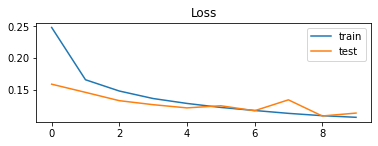

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

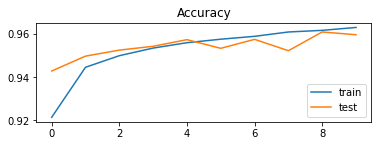

In [ ]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(
      x=test_padded
    , batch_size=128
    , verbose=0
) 

In [ ]:
for i in predictions:
    print(i)
    

In [ ]:
rounded_predictions = np.argmax(predictions, axis=1)

#for i in rounded_predictions:
    #print(i)

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
y_test

eco  ent  int  sprt  state
301296    0    0    0     0      1
269233    0    0    0     0      1
141418    0    0    0     1      0
79651     1    0    0     0      0
345656    0    0    0     0      1
...     ...  ...  ...   ...    ...
333703    0    0    0     0      1
291237    0    0    0     0      1
33092     0    0    0     0      1
168256    0    0    0     1      0
350600    0    0    0     0      1

[37372 rows x 5 columns]

In [ ]:
for i in y_test:
    print(i)

eco
ent
int
sprt
state


In [ ]:
y_true=np.array(y_test)
y_true[1]

array([0, 0, 0, 0, 1], dtype=uint8)

In [ ]:
cm = confusion_matrix(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions)

In [ ]:
cm

array([[ 1452,     9,    20,     4,   388],
       [    4,  2868,    14,    10,   118],
       [   28,    52,  2915,     6,   209],
       [    0,    26,    26,  4981,    19],
       [  279,   186,    65,    43, 23650]])

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['eco','ent', 'int', 'sprt', 'state']

Confusion matrix, without normalization
[[ 1452     9    20     4   388]
 [    4  2868    14    10   118]
 [   28    52  2915     6   209]
 [    0    26    26  4981    19]
 [  279   186    65    43 23650]]


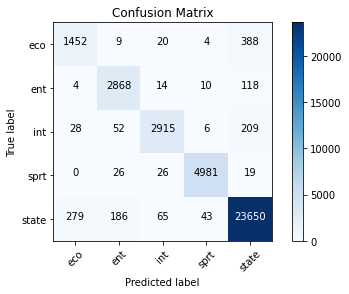

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions, target_names=cm_plot_labels ))

              precision    recall  f1-score   support

         eco       0.82      0.78      0.80      1873
         ent       0.91      0.95      0.93      3014
         int       0.96      0.91      0.93      3210
        sprt       0.99      0.99      0.99      5052
       state       0.97      0.98      0.97     24223

    accuracy                           0.96     37372
   macro avg       0.93      0.92      0.92     37372
weighted avg       0.96      0.96      0.96     37372



In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions, average=None)

array([0.79867987, 0.93192526, 0.9328    , 0.98672742, 0.97311087])

In [ ]:
f1_score(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions, average='macro')

0.9246486835206866

In [ ]:
f1_score(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions, average='micro')

0.9597024510328588

In [ ]:
f1_score(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions, average='weighted')

0.9594254956438736

In [ ]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [ ]:
from keras.models import Sequential
from keras import layers


In [ ]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(num_words, 300, input_length=max_length))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:

model = Sequential()

model.add(
    Embedding(
        num_words,
        300,
        embeddings_initializer = Constant(embedding_matrix),
        input_length = max_length,
        trainable= False,
                    
    )
)

#model.add(Embedding(num_words, 128, input_length=max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.6))
model.add(Dense(5, activation='softmax'))